# Exploratory Data Analysis

In [1]:
from   farfetch          import Farfetch
import pandas            as     pd
import matplotlib.pyplot as     plt
import seaborn           as     sns
sns.set_style("darkgrid")

In [2]:
ff = Farfetch()

Total number of product ratings:   21641
Total number of in-stock ratings:  16105
Total number of unique customers:  9667
Total number of unique products:   13518


## In-Stock Product Reviews

In [3]:
# check utility matrix for recommender systems
utility_matrix, in_stock_reviews, users, items = ff.get_utility_matrix()
in_stock_reviews.head()

Total number of product ratings:   21641
Total number of in-stock ratings:  16105
Total number of unique customers:  9667
Total number of unique products:   13518


,User,Item,URL,Rating,Category,Color,Designer,Discount,Gender,Made In,On Sale,Original,Product,Style,Subcategory
0,Pitchanun,"Valentino, Valentino Garavani Open sneakers",https://www.farfetch.com/shopping/women/valent...,5.0,Shoes,JN5 BIANCO BLUE,Valentino,0,Women,Made in Italy,695,695,Valentino Garavani Open sneakers,RW2S0781BLU,Sneakers
1,Pitchanun,"Valentino, Valentino Garavani Open sneakers",https://www.farfetch.com/shopping/women/valent...,5.0,Shoes,JN5 BIANCO BLUE,Valentino,0,Women,Made in Italy,695,695,Valentino Garavani Open sneakers,RW2S0781BLU,Sneakers
2,Marcel G.Torres,"Valentino, Valentino Garavani Open sneakers",https://www.farfetch.com/shopping/women/valent...,4.0,Shoes,JN5 BIANCO BLUE,Valentino,0,Women,Made in Italy,695,695,Valentino Garavani Open sneakers,RW2S0781BLU,Sneakers
3,Ebba Hellberg,"Valentino, Valentino Garavani Open sneakers",https://www.farfetch.com/shopping/women/valent...,5.0,Shoes,JN5 BIANCO BLUE,Valentino,0,Women,Made in Italy,695,695,Valentino Garavani Open sneakers,RW2S0781BLU,Sneakers
4,林寶鳳,"Joseph, slim-fit trousers",https://www.farfetch.com/shopping/women/joseph...,5.0,Clothing,0211 SMOKE,Joseph,50,Women,Imported,126,252,slim-fit trousers,JP000631,Slim Pants


In [4]:
items.nunique()

Item           12375
URL            13518
Category          29
Color           7788
Designer        1184
Discount          16
Gender             3
Made In            5
On Sale         1227
Original        1300
Product        10687
Style          12596
Subcategory      374
dtype: int64

User--> total groups: 9667
LUCAS NGUYEN    60
Olga            36
Elena           36
Vladislav       34
zhangxudong     31
Natalia         27
Fatemah         27
soojin yoon     27
monirula        24
Ekaterina       23
Name: User, dtype: int64

User--> frequency distribution: 29
1     6693
2     1673
3      616
4      290
5      148
6       79
7       53
8       24
9       26
11      13
Name: User, dtype: int64


Item--> total groups: 12375
Golden Goose, Superstar sneakers                38
Kenzo, Tiger print T-shirt                      35
Alexander McQueen, oversized sole sneakers      27
Gucci, Leather belt with double G buckle        25
Balmain, logo print T-shirt                     20
Valentino, Valentino Garavani Open sneakers     19
Stella McCartney, Eclypse sneakers              17
Dolce & Gabbana, Portofino sneakers             16
Buffalo, platform sneakers                      16
Valentino, Valentino Garavani Rockstud pumps    15
Name: Item, dtype: int64

Item--> frequency dis

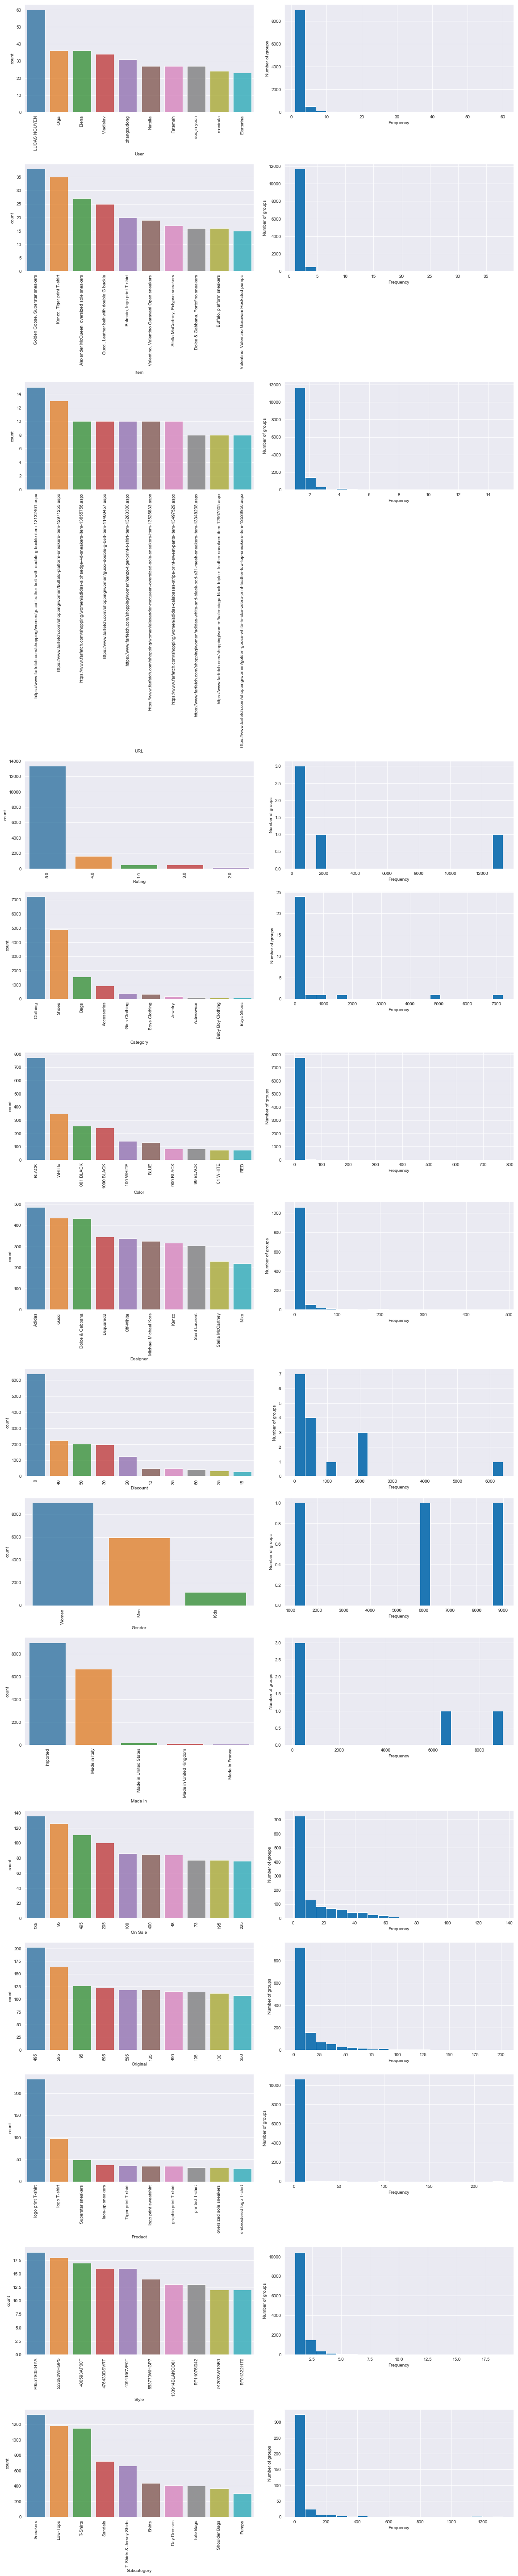

In [5]:
# print count and frequency plots of each data column
fig, axes = plt.subplots(nrows=len(in_stock_reviews.columns),
                       ncols=2,
                       figsize=(16,80), constrained_layout=True)

for i in range(len(in_stock_reviews.columns)):
    column = in_stock_reviews.columns[i]
    print(column + '--> total groups: ' + str(len(in_stock_reviews[column].value_counts())))
    print(str(in_stock_reviews[column].value_counts().iloc[:10]) + '\n')
    
    g=sns.countplot(in_stock_reviews[column],
                    order=in_stock_reviews[column].value_counts().iloc[:10].index,
                    alpha=0.8, ax=axes[i,0])
    g.set_xticklabels(rotation=90,labels=in_stock_reviews[column].value_counts().iloc[:10].index)
    
    print(column + '--> frequency distribution: '
          + str(len(in_stock_reviews.groupby(column)[column].count().value_counts())))
    print(str(in_stock_reviews.groupby(column)[column]
              .count().value_counts().iloc[:10].sort_index(ascending=True)) + '\n\n')
    
    in_stock_reviews.groupby(column)[column].count().hist(bins=20, ax=axes[i,1])
    axes[i,1].set(xlabel='Frequency', ylabel='Number of groups')

In [6]:
# show top designers
df = in_stock_reviews.loc[(in_stock_reviews['Designer'] == 'Adidas') |
                          (in_stock_reviews['Designer'] == 'Gucci') |
                          (in_stock_reviews['Designer'] == 'Dolce & Gabbana')]
df.head()

,User,Item,URL,Rating,Category,Color,Designer,Discount,Gender,Made In,On Sale,Original,Product,Style,Subcategory
15,Bruna PigattoCasarin,"Gucci, GG Marmont matelassé leather super mini...",https://www.farfetch.com/shopping/women/gucci-...,5.0,Bags,1000 nero,Gucci,0,Women,Made in Italy,890,890,GG Marmont matelassé leather super mini bag,476433DSVRT,Mini Bags
16,Bruna PigattoCasarin,"Gucci, GG Marmont matelassé leather super mini...",https://www.farfetch.com/shopping/women/gucci-...,5.0,Bags,1000 nero,Gucci,0,Women,Made in Italy,890,890,GG Marmont matelassé leather super mini bag,476433DSVRT,Mini Bags
17,Cindy Schlickmann,"Gucci, GG Marmont matelassé leather super mini...",https://www.farfetch.com/shopping/women/gucci-...,5.0,Bags,1000 nero,Gucci,0,Women,Made in Italy,890,890,GG Marmont matelassé leather super mini bag,476433DSVRT,Mini Bags
18,Renata GaiaoJorge,"Gucci, GG Marmont matelassé leather super mini...",https://www.farfetch.com/shopping/women/gucci-...,4.0,Bags,1000 nero,Gucci,0,Women,Made in Italy,890,890,GG Marmont matelassé leather super mini bag,476433DSVRT,Mini Bags
19,Luciana,"Gucci, GG Marmont matelassé leather super mini...",https://www.farfetch.com/shopping/women/gucci-...,5.0,Bags,1000 nero,Gucci,0,Women,Made in Italy,890,890,GG Marmont matelassé leather super mini bag,476433DSVRT,Mini Bags


Total number of product ratings:   21641
Total number of in-stock ratings:  16105
Total number of unique customers:  9667
Total number of unique products:   13518
(13518, 9667)
Sparsity:             0.9998776003759945
One product per user: 0.9998965552911968
One user per product: 0.9999260245598461


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7738: RuntimeWarning: invalid value encountered in greater
  nonzero = np.abs(Z) > precision


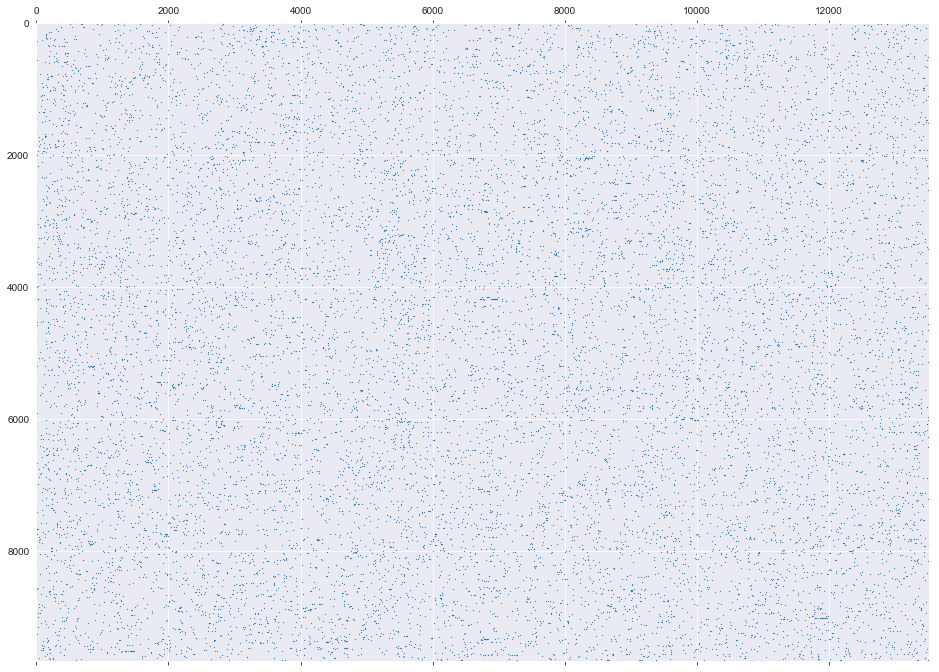

In [7]:
# user-product sparsity matrix
utility_matrix           = ff.get_utility_matrix()[0]
utility_matrix['Rating'] = 1
utility_matrix           = utility_matrix.drop_duplicates()
print(utility_matrix.pivot(index='URL', columns='User', values='Rating').shape)

# sparsity
n_products = utility_matrix.pivot(index='URL', columns='User', values='Rating').shape[0]
n_users    = utility_matrix.pivot(index='URL', columns='User', values='Rating').shape[1]
print('Sparsity:             ' + str(1 - (utility_matrix.shape[0] / (n_products * n_users))))
print('One product per user: ' + str(1 - 1/9667))
print('One user per product: ' + str(1 - 1/13518))

fig, axes = plt.subplots(figsize=(16,16))
plt.spy(utility_matrix.pivot(index='User', columns='URL', values='Rating'), markersize=0.25)

In [8]:
# heatmap of similarity matrix
# similarity_matrix = pd.read_pickle("../Data/content_similarity_matrix_GMC.pkl")
# print(similarity_matrix.shape)
# similarity_matrix

# fig, axes = plt.subplots(figsize=(8,16))
# sns.heatmap(similarity_matrix)